# Tutorial 5: Visualize 

This tutorial explains how we can convert an arbitrary audio clip to an audio representation. You can find examples:

1. Load and convert an audio clip to a spectrogram.
2. Calculate statistics to normalize spectrograms.
3. Loading a BYOL-A model and pre-trained weight.
4. Encode spectrograms to representations.

### ⚠ Setup before you proceed ⚠

If you have not setup, run the commands in [Setup-commands.txt](../Setup-commands.txt).

### ⚠ ADDITIONAL SETUP NEEDED FOR DATASETS ⚠

See instructions below:
- [US8K setup instruction](https://github.com/nttcslab/eval-audio-repr/blob/main/Preparing-datasets.md#urbansound8k)
- [CREMA-D setup instruction](https://github.com/nttcslab/eval-audio-repr/blob/main/Preparing-datasets.md#crema-d)

---
### 0.1 Making the notebook work better

First, setup autoloading of this notebook. Thanks to https://github.com/ipython/ipython/issues/9732

In [1]:
import IPython

from IPython import get_ipython
ipython = get_ipython()
ipython.magic('reload_ext autoreload')
ipython.magic('autoreload 2')
ipython.magic('matplotlib inline')

### 0.2 Adding path and import modules

We append root folder and EVAR folder to the system `path`.

In [2]:
import sys
sys.path.extend(['..', '../evar'])

Import modules needed to run the followings.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import torch
import torchaudio
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



## 1. US8K

In [4]:
%cd ../evar

/lab/test_cgar/evar


In [5]:
from evar.common import load_yaml_config
from evar.ds_tasks import get_defs
from evar.data import create_dataloader

FOLD = 1
cfg = load_yaml_config('config/cnn14.yaml')
task_metadata, task_data, n_folds, unit_sec, activation = get_defs(cfg, 'us8k')
cfg.task_metadata = task_metadata
cfg.unit_samples = int(unit_sec * cfg.sample_rate)
cfg.task_data = task_data
train_loader, valid_loader, test_loader, multi_label = create_dataloader(cfg, fold=FOLD, seed=42, balanced_random=False, pin_memory=False)

# We use test set in this example.
print(f'US8K fold#{FOLD} number of samples:', len(test_loader.dataset))

US8K fold#1 number of samples: 873


dog_bark
tensor([-9.1553e-05, -1.8311e-04, -1.5259e-04, -1.5259e-04, -1.5259e-04,
        -2.1362e-04, -2.1362e-04, -2.1362e-04])


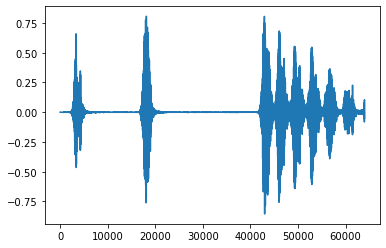

In [6]:
# Example waveform
x, y = test_loader.dataset[0]
plt.plot(x); print(test_loader.dataset.classes[y]); print(x[:8])

### 1.1 Visualize embeddings

In [7]:
import evar.ar_byola
from evar.ar_base import calculate_norm_stats

cfg = load_yaml_config('config/byola.yaml')
cfg.unit_samples = int(unit_sec * cfg.sample_rate)
byola = evar.ar_byola.AR_BYOLA(cfg)
byola.norm_stats = torch.tensor([-6.465687, 4.7879076]) # precomputed by: $ python lineareval.py config/byola.yaml us8k

features = [byola(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in range(len(test_loader.dataset))]
features[0].shape

['features.0.weight', 'features.0.bias', 'features.1.weight', 'features.1.bias', 'features.1.running_mean', 'features.1.running_var', 'features.1.num_batches_tracked', 'features.4.weight', 'features.4.bias', 'features.5.weight', 'features.5.bias', 'features.5.running_mean', 'features.5.running_var', 'features.5.num_batches_tracked', 'features.8.weight', 'features.8.bias', 'features.9.weight', 'features.9.bias', 'features.9.running_mean', 'features.9.running_var', 'features.9.num_batches_tracked', 'fc.0.weight', 'fc.0.bias', 'fc.3.weight', 'fc.3.bias']


(2048,)

In [8]:
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
reduced.shape

(873, 2)

Text(0.5, 1.0, 'UMAP projection of the BYOL-A features on US8K fold#1')

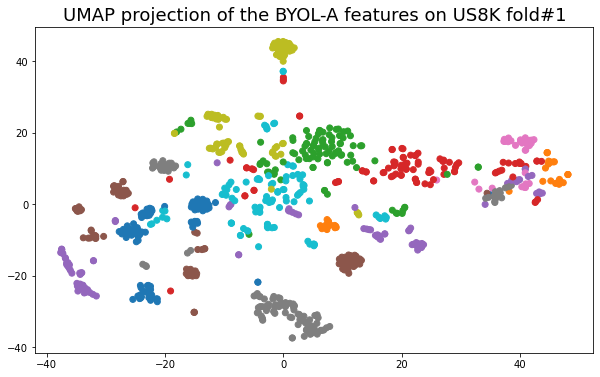

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette()[x] for x in test_loader.dataset.labels])
plt.title(f'UMAP projection of the BYOL-A features on US8K fold#{FOLD}', fontsize=18)

Text(0.5, 1.0, 'UMAP projection of the VGGish features on US8K fold#1')

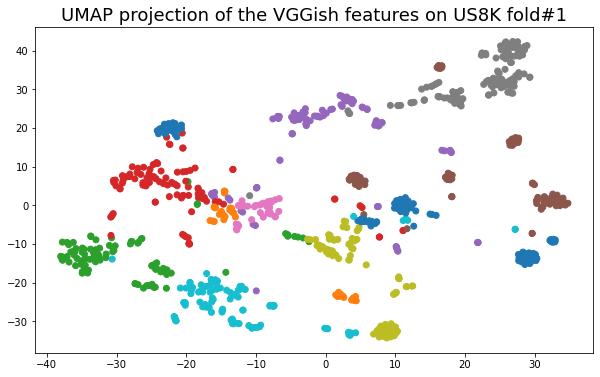

In [10]:
import evar.ar_vggish

cfg = load_yaml_config('config/vggish.yaml')
vggish = evar.ar_vggish.AR_VGGish(cfg)

features = [vggish(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in range(len(test_loader.dataset))]
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette()[x] for x in test_loader.dataset.labels])
plt.title(f'UMAP projection of the VGGish features on US8K fold#{FOLD}', fontsize=18)

['bn0.weight', 'bn0.bias', 'bn0.running_mean', 'bn0.running_var', 'bn0.num_batches_tracked', 'conv_block1.conv1.weight', 'conv_block1.conv2.weight', 'conv_block1.bn1.weight', 'conv_block1.bn1.bias', 'conv_block1.bn1.running_mean', 'conv_block1.bn1.running_var', 'conv_block1.bn1.num_batches_tracked', 'conv_block1.bn2.weight', 'conv_block1.bn2.bias', 'conv_block1.bn2.running_mean', 'conv_block1.bn2.running_var', 'conv_block1.bn2.num_batches_tracked', 'conv_block2.conv1.weight', 'conv_block2.conv2.weight', 'conv_block2.bn1.weight', 'conv_block2.bn1.bias', 'conv_block2.bn1.running_mean', 'conv_block2.bn1.running_var', 'conv_block2.bn1.num_batches_tracked', 'conv_block2.bn2.weight', 'conv_block2.bn2.bias', 'conv_block2.bn2.running_mean', 'conv_block2.bn2.running_var', 'conv_block2.bn2.num_batches_tracked', 'conv_block3.conv1.weight', 'conv_block3.conv2.weight', 'conv_block3.bn1.weight', 'conv_block3.bn1.bias', 'conv_block3.bn1.running_mean', 'conv_block3.bn1.running_var', 'conv_block3.bn1.n

Text(0.5, 1.0, "t-SNE projection of the PANNs' CNN14 features on US8K fold#1")

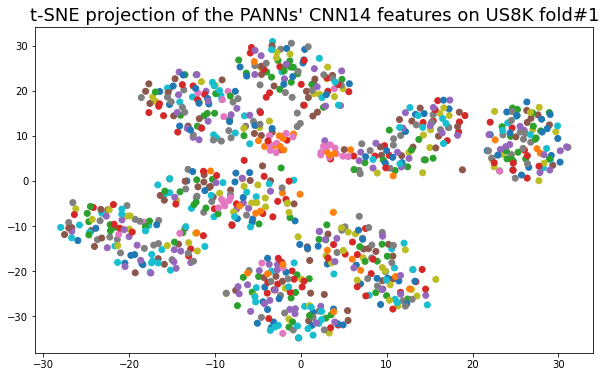

In [12]:
import evar.ar_cnn14

cfg = load_yaml_config('config/cnn14.yaml')
cnn14 = evar.ar_cnn14.AR_Cnn14(cfg)

features = [cnn14(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in range(len(test_loader.dataset))]
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette()[x] for x in test_loader.dataset.labels])
plt.title(f"t-SNE projection of the PANNs' CNN14 features on US8K fold#{FOLD}", fontsize=18)

## CREMA-D Examples

In [13]:
FOLD=0
DATASET = 'CREMA-D'
cfg = load_yaml_config('config/cnn14.yaml')
task_metadata, task_data, n_folds, unit_sec, activation = get_defs(cfg, 'cremad')
cfg.task_metadata = task_metadata
cfg.unit_samples = int(unit_sec * cfg.sample_rate)
cfg.task_data = task_data
train_loader, valid_loader, test_loader, multi_label = create_dataloader(cfg, fold=FOLD, seed=42, balanced_random=False, pin_memory=False)
K = 500
random_index = np.random.permutation(len(test_loader.dataset))[:K]

['features.0.weight', 'features.0.bias', 'features.1.weight', 'features.1.bias', 'features.1.running_mean', 'features.1.running_var', 'features.1.num_batches_tracked', 'features.4.weight', 'features.4.bias', 'features.5.weight', 'features.5.bias', 'features.5.running_mean', 'features.5.running_var', 'features.5.num_batches_tracked', 'features.8.weight', 'features.8.bias', 'features.9.weight', 'features.9.bias', 'features.9.running_mean', 'features.9.running_var', 'features.9.num_batches_tracked', 'fc.0.weight', 'fc.0.bias', 'fc.3.weight', 'fc.3.bias']


Text(0.5, 1.0, 't-SNE projection of the BYOL-A features on CREMA-D')

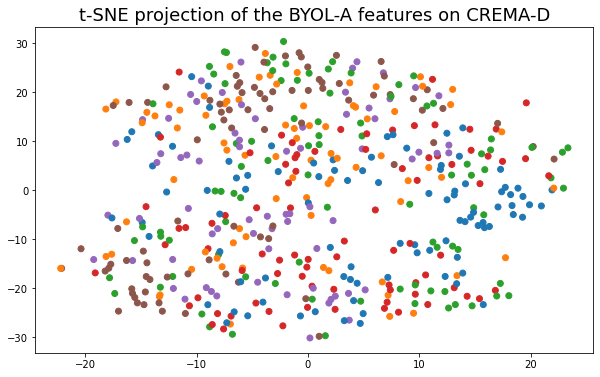

In [14]:
cfg = load_yaml_config('config/byola.yaml')
cfg.unit_samples = int(unit_sec * cfg.sample_rate)
ar = evar.ar_byola.AR_BYOLA(cfg)
ar.norm_stats = torch.tensor([-6.465687, 4.7879076]) # precomputed by: $ python lineareval.py config/byola.yaml us8k

features = [ar(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in random_index]
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette(n_colors=50)[x] for x in test_loader.dataset.labels[random_index]])
plt.title(f"t-SNE projection of the BYOL-A features on {DATASET}", fontsize=18)

Text(0.5, 1.0, 't-SNE projection of the VGGish features on CREMA-D')

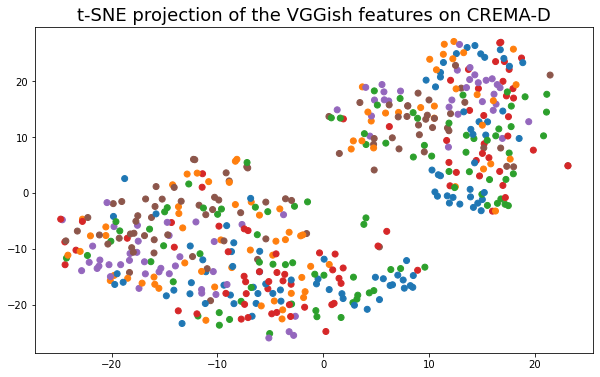

In [15]:
cfg = load_yaml_config('config/vggish.yaml')
ar = evar.ar_vggish.AR_VGGish(cfg)

features = [ar(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in random_index]
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette(n_colors=50)[x] for x in test_loader.dataset.labels[random_index]])
plt.title(f't-SNE projection of the VGGish features on {DATASET}', fontsize=18)

['bn0.weight', 'bn0.bias', 'bn0.running_mean', 'bn0.running_var', 'bn0.num_batches_tracked', 'conv_block1.conv1.weight', 'conv_block1.conv2.weight', 'conv_block1.bn1.weight', 'conv_block1.bn1.bias', 'conv_block1.bn1.running_mean', 'conv_block1.bn1.running_var', 'conv_block1.bn1.num_batches_tracked', 'conv_block1.bn2.weight', 'conv_block1.bn2.bias', 'conv_block1.bn2.running_mean', 'conv_block1.bn2.running_var', 'conv_block1.bn2.num_batches_tracked', 'conv_block2.conv1.weight', 'conv_block2.conv2.weight', 'conv_block2.bn1.weight', 'conv_block2.bn1.bias', 'conv_block2.bn1.running_mean', 'conv_block2.bn1.running_var', 'conv_block2.bn1.num_batches_tracked', 'conv_block2.bn2.weight', 'conv_block2.bn2.bias', 'conv_block2.bn2.running_mean', 'conv_block2.bn2.running_var', 'conv_block2.bn2.num_batches_tracked', 'conv_block3.conv1.weight', 'conv_block3.conv2.weight', 'conv_block3.bn1.weight', 'conv_block3.bn1.bias', 'conv_block3.bn1.running_mean', 'conv_block3.bn1.running_var', 'conv_block3.bn1.n

Text(0.5, 1.0, 't-SNE projection of the PANNs CNN14 features on CREMA-D')

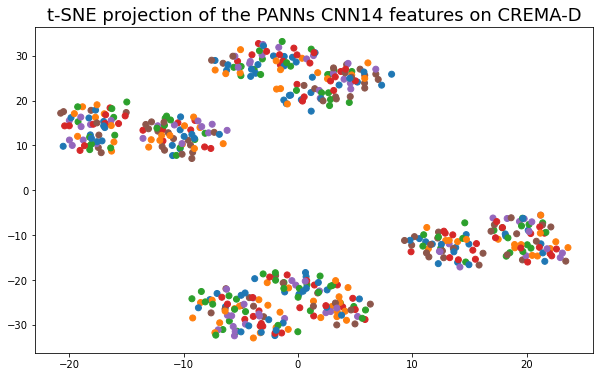

In [16]:
cfg = load_yaml_config('config/cnn14.yaml')
ar = evar.ar_cnn14.AR_Cnn14(cfg)

features = [ar(test_loader.dataset[i][0].unsqueeze(0))[0].detach().numpy()
            for i in random_index]
reduced = TSNE(n_components=2, random_state=0).fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[sns.color_palette(n_colors=50)[x] for x in test_loader.dataset.labels[random_index]])
plt.title(f't-SNE projection of the PANNs CNN14 features on {DATASET}', fontsize=18)